<a href="https://colab.research.google.com/github/Akshat5129/Artificial-Intelligence/blob/main/Assignment_2_AU19B1023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
from sklearn import preprocessing,model_selection

In [6]:
import warnings

In [7]:
warnings.filterwarnings('ignore')

In [8]:
data=pd.read_csv('diabetes.csv')

In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
data.shape

(768, 9)

In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
X=data.drop('Outcome',axis=1)

In [14]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [15]:
Y=data['Outcome']

In [16]:
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,test_size=0.2)

In [17]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(614, 8) (614,) (154, 8) (154,)


In [18]:
import tensorflow as tf

In [19]:
from tensorflow import keras

In [20]:
from tensorflow.keras import layers,callbacks

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
EarlyStopping= callbacks.EarlyStopping(min_delta=0.001,patience=20,restore_best_weights=True)

In [23]:
model=keras.Sequential([
    layers.Dense(13,activation='relu',input_shape=[8]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(8,activation='relu'),
    layers.Dense(1)])

In [24]:
model.compile(optimizer='adam',loss='binary_crossentropy')

In [25]:
history=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),batch_size=256,epochs=200,callbacks=[EarlyStopping],verbose=0)


In [26]:
history_df=pd.DataFrame(history.history)

In [27]:
history_df.columns

Index(['loss', 'val_loss'], dtype='object')

In [28]:
history_df.describe()

,loss,val_loss
count,54.000000,54.000000
mean,1.878529,2.228532
std,0.179625,1.444263
min,1.519631,1.159367
25%,1.776113,1.350627
50%,1.860113,1.626728
75%,1.980780,2.592194
max,2.427485,8.252430


In [39]:
history_df.columns

Index(['loss', 'val_loss'], dtype='object')

In [40]:
history_df['loss']

0     2.300176
1     2.326979
2     2.427485
3     1.892613
4     2.029219
5     2.005422
6     2.014840
7     2.080863
8     1.727815
9     2.037009
10    1.993648
11    1.933710
12    1.991242
13    2.220763
14    2.038013
15    2.021135
16    2.009330
17    1.860998
18    1.883290
19    1.877321
20    1.765854
21    1.793487
22    1.860992
23    1.575430
24    1.896834
25    1.859233
26    1.942748
27    1.842952
28    1.728981
29    1.825821
30    1.771603
31    1.626213
32    1.828302
33    1.894669
34    1.856441
35    1.926715
36    1.883840
37    1.813072
38    1.919997
39    1.720784
40    1.662251
41    1.949395
42    1.819542
43    1.801164
44    1.785608
45    1.672063
46    1.519631
47    1.841124
48    1.791441
49    1.599644
50    1.758964
51    1.626122
52    1.772948
53    1.834808
Name: loss, dtype: float64

In [41]:
history_df['loss'].min()

1.519631266593933

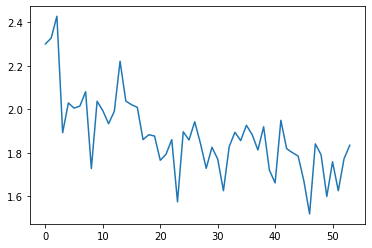

In [32]:
history_df.loc[:,'loss'].plot()

In [33]:
Y_test.describe()

count    154.000000
mean       0.311688
std        0.464694
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

In [34]:
Y_test.max()

1

In [35]:
print(type(Y_test))

<class 'pandas.core.series.Series'>


In [36]:
accuracy=model.evaluate(X,Y)

24/24 [==============================] - 0s 2ms/step - loss: 1.2239


In [37]:
print(accuracy*100)

122.38665819168091


In [38]:
data['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64